In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

## Load dataset

In [2]:
df = pd.read_csv("./telecom_churn/dataset/telcom_customer_churn.csv", encoding="utf-8")
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,24.00,219.25,22.50,0.25,0.00,0.00,0.00,0.00,0.00,-157.25,...,0.00,N,U,U,U,U,U,Y,361.00,1000001
1,57.49,482.75,37.42,0.25,22.75,9.10,9.10,0.00,0.00,532.25,...,0.00,Z,U,U,U,U,U,Y,240.00,1000002
2,16.99,10.25,16.99,0.00,0.00,0.00,0.00,0.00,0.00,-4.25,...,0.00,N,U,Y,U,U,U,Y,1504.00,1000003
3,38.00,7.50,38.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.50,...,0.00,U,Y,U,U,U,U,Y,1812.00,1000004
4,55.23,570.50,71.98,0.00,0.00,0.00,0.00,0.00,0.00,38.50,...,0.00,I,U,U,U,U,U,Y,434.00,1000005


## EDA preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [4]:
def columns_of_dtypes(dataset):
    d = dict()   
    for ctypes in zip(dataset.dtypes, dataset.columns):
        d.setdefault(str(ctypes[0]), []).append(ctypes[1])
    return d

columns_of_dtypes(df).keys()

dict_keys(['float64', 'int64', 'object'])

In [5]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.00,99643.00,99643.00,99643.00,99643.00,99643.00,99643.00,99643.00,99643.00,99109.00,...,99999.00,98268.00,98268.00,69810.00,76981.00,74564.00,50634.00,98268.00,99999.00,100000.00
mean,58.72,513.56,46.18,0.89,41.07,13.56,13.30,0.26,1.29,-13.93,...,1.55,0.19,0.08,6.18,2.53,5.78,1.57,0.06,391.93,1050000.50
std,46.29,525.17,23.62,2.18,97.30,30.50,30.06,3.13,14.71,276.09,...,0.90,0.39,0.28,4.74,1.45,2.18,0.63,0.23,256.48,28867.66
min,-6.17,0.00,-26.91,0.00,0.00,0.00,0.00,0.00,0.00,-3875.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,-5.00,1000001.00
25%,33.26,150.75,30.00,0.00,0.00,0.00,0.00,0.00,0.00,-87.00,...,1.00,0.00,0.00,2.00,1.00,4.00,1.00,0.00,212.00,1025000.75
50%,48.20,355.50,44.99,0.25,2.75,1.00,0.68,0.00,0.00,-6.25,...,1.00,0.00,0.00,5.00,2.00,6.00,1.00,0.00,342.00,1050000.50
75%,70.75,703.00,59.99,0.99,42.00,14.44,14.03,0.00,0.23,63.00,...,2.00,0.00,0.00,9.00,3.00,7.00,2.00,0.00,530.00,1075000.25
max,3843.26,12206.75,409.99,159.39,4320.75,1102.40,896.09,423.54,3685.20,31219.25,...,16.00,1.00,1.00,15.00,6.00,9.00,3.00,1.00,1823.00,1100000.00


In [6]:
# Unique variables of object columns
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique(), end=' | ')
    encoding_col.append(i)

new_cell --> 3 | crclscod --> 54 | asl_flag --> 2 | prizm_social_one --> 5 | area --> 19 | dualband --> 4 | refurb_new --> 2 | hnd_webcap --> 3 | ownrent --> 2 | dwlltype --> 2 | marital --> 5 | infobase --> 2 | HHstatin --> 6 | dwllsize --> 15 | ethnic --> 17 | kid0_2 --> 2 | kid3_5 --> 2 | kid6_10 --> 2 | kid11_15 --> 2 | kid16_17 --> 2 | creditcd --> 2 | 

In [7]:
df['Customer_ID'].nunique()
# df.drop(['Customer_ID'], axis = 1, inplace=True)

100000

Судя по всему, несмотря на числовой тип данных, столбец "Customer_ID" является числовым уникальным идентификатором записи (GUID). С точки зрения модели для предсказания такое число не имеет практической ценности, однако удалим данным столбец потом, так как этот столбец позволит нам применить одинаковые преобразования для всех выборок (train, test, validation) и первоначально мы можем оперировать со всем массивом данных.

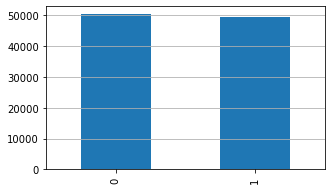

In [8]:
df['churn'].value_counts().plot.bar(figsize=(5, 3))
plt.grid(axis='y')

Целевой класс примерно сбалансирован:

In [9]:
total = df.shape[0]
stay = df[(df['churn']==0)].count()[1]
churn = df[(df['churn']==1)].count()[1]
print ("stay: {0} ({1:0.2f}%)".format(stay, stay/total*100))
print ("churn: {0} ({1:0.2f}%)".format(churn, churn/total*100))

stay: 50326 (50.33%)
churn: 49317 (49.32%)


Базовые naive baseline всего лишь чуть более 50%

### Missing values

In [10]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.37
dwllsize,38308,38.31
HHstatin,37923,37.92
ownrent,33706,33.71
dwlltype,31909,31.91
lor,30190,30.19
income,25436,25.44
adults,23019,23.02
infobase,22079,22.08
hnd_webcap,10189,10.19


In [11]:
# Handle missing values using different strategies

# Categorical - filling with Unknown class
df.select_dtypes(include=['object']).fillna("Unknown", inplace=True)

# Fill the rest numeric NaN with most frequent values
df.fillna(df.mode().iloc[0], inplace=True)

In [12]:
sum(df.isnull().sum()>0)

0

### Distribution and outliers

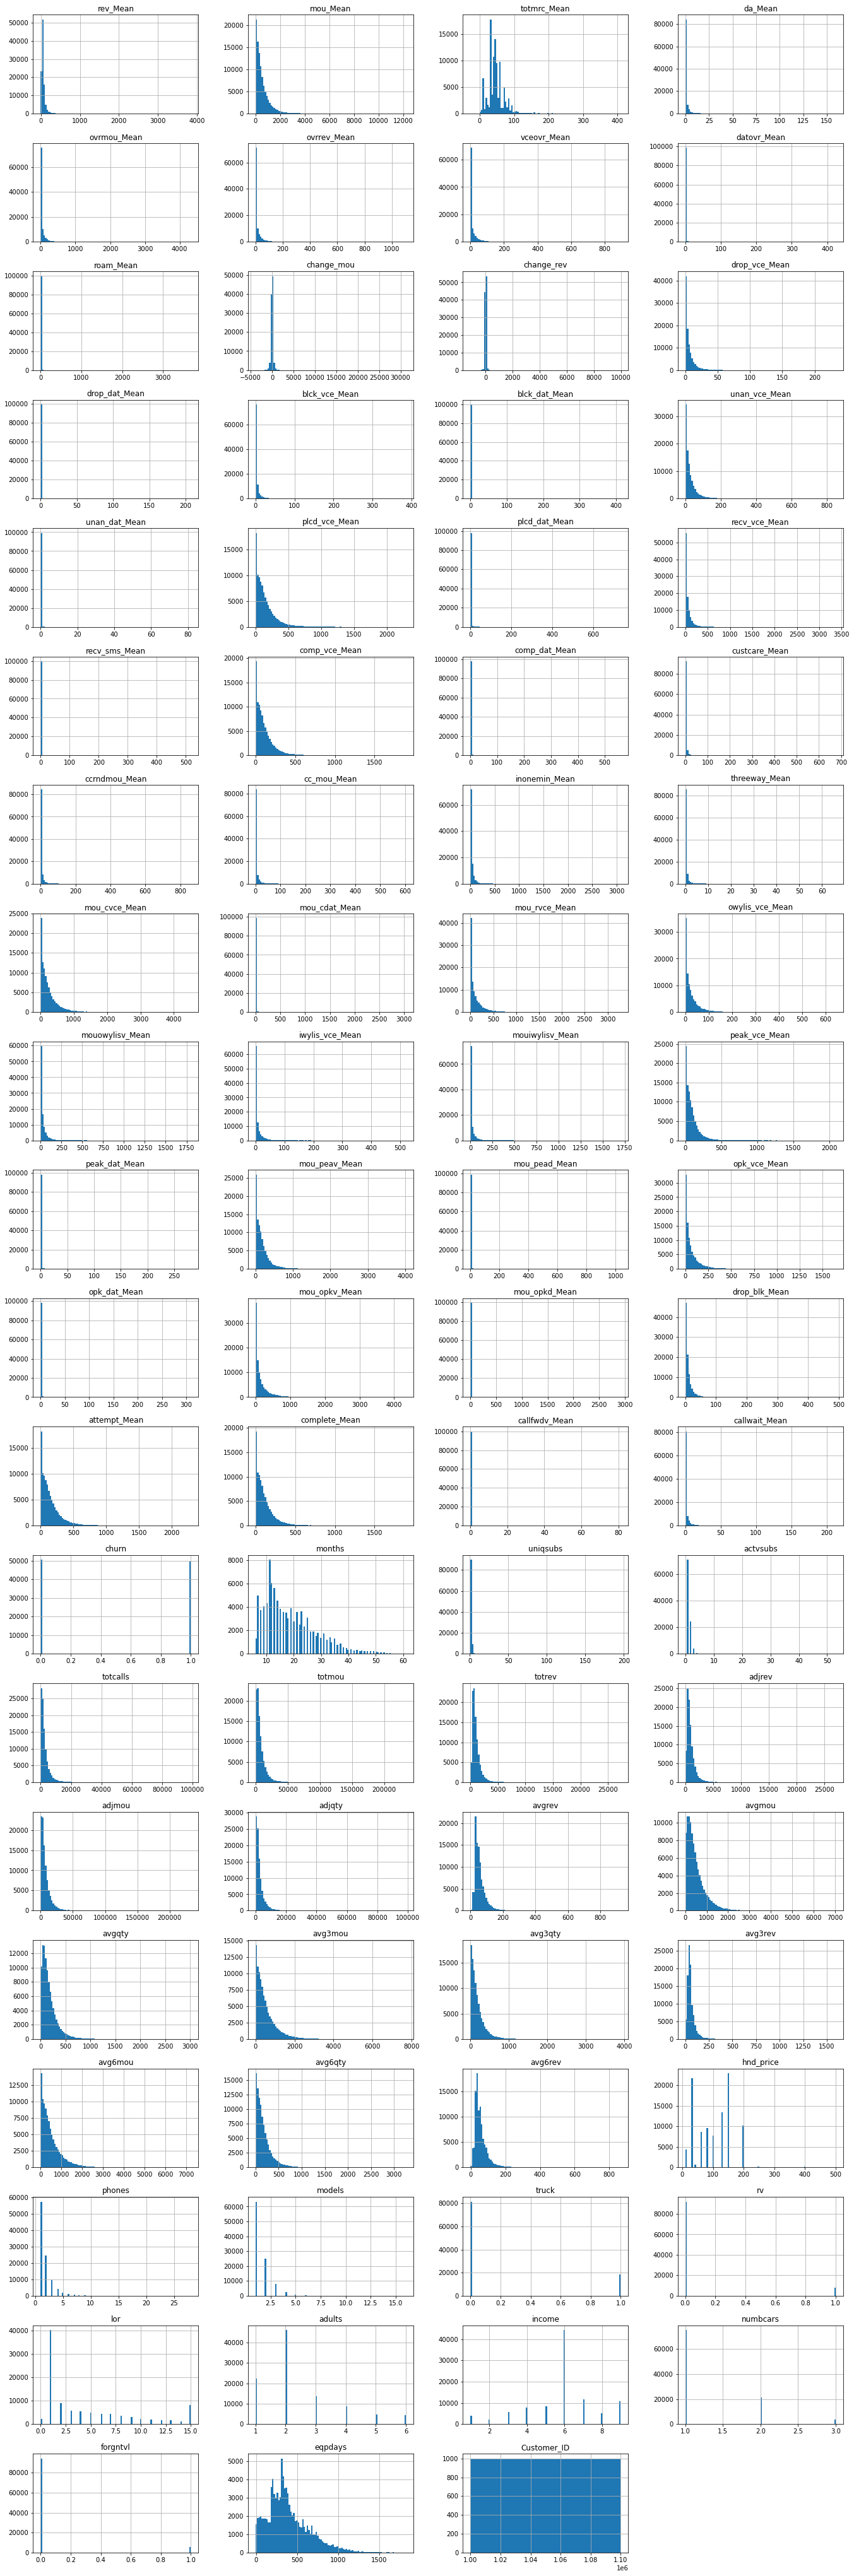

In [13]:
df.iloc[:,:].hist(bins=100,figsize=(23,74),layout=(20,4));

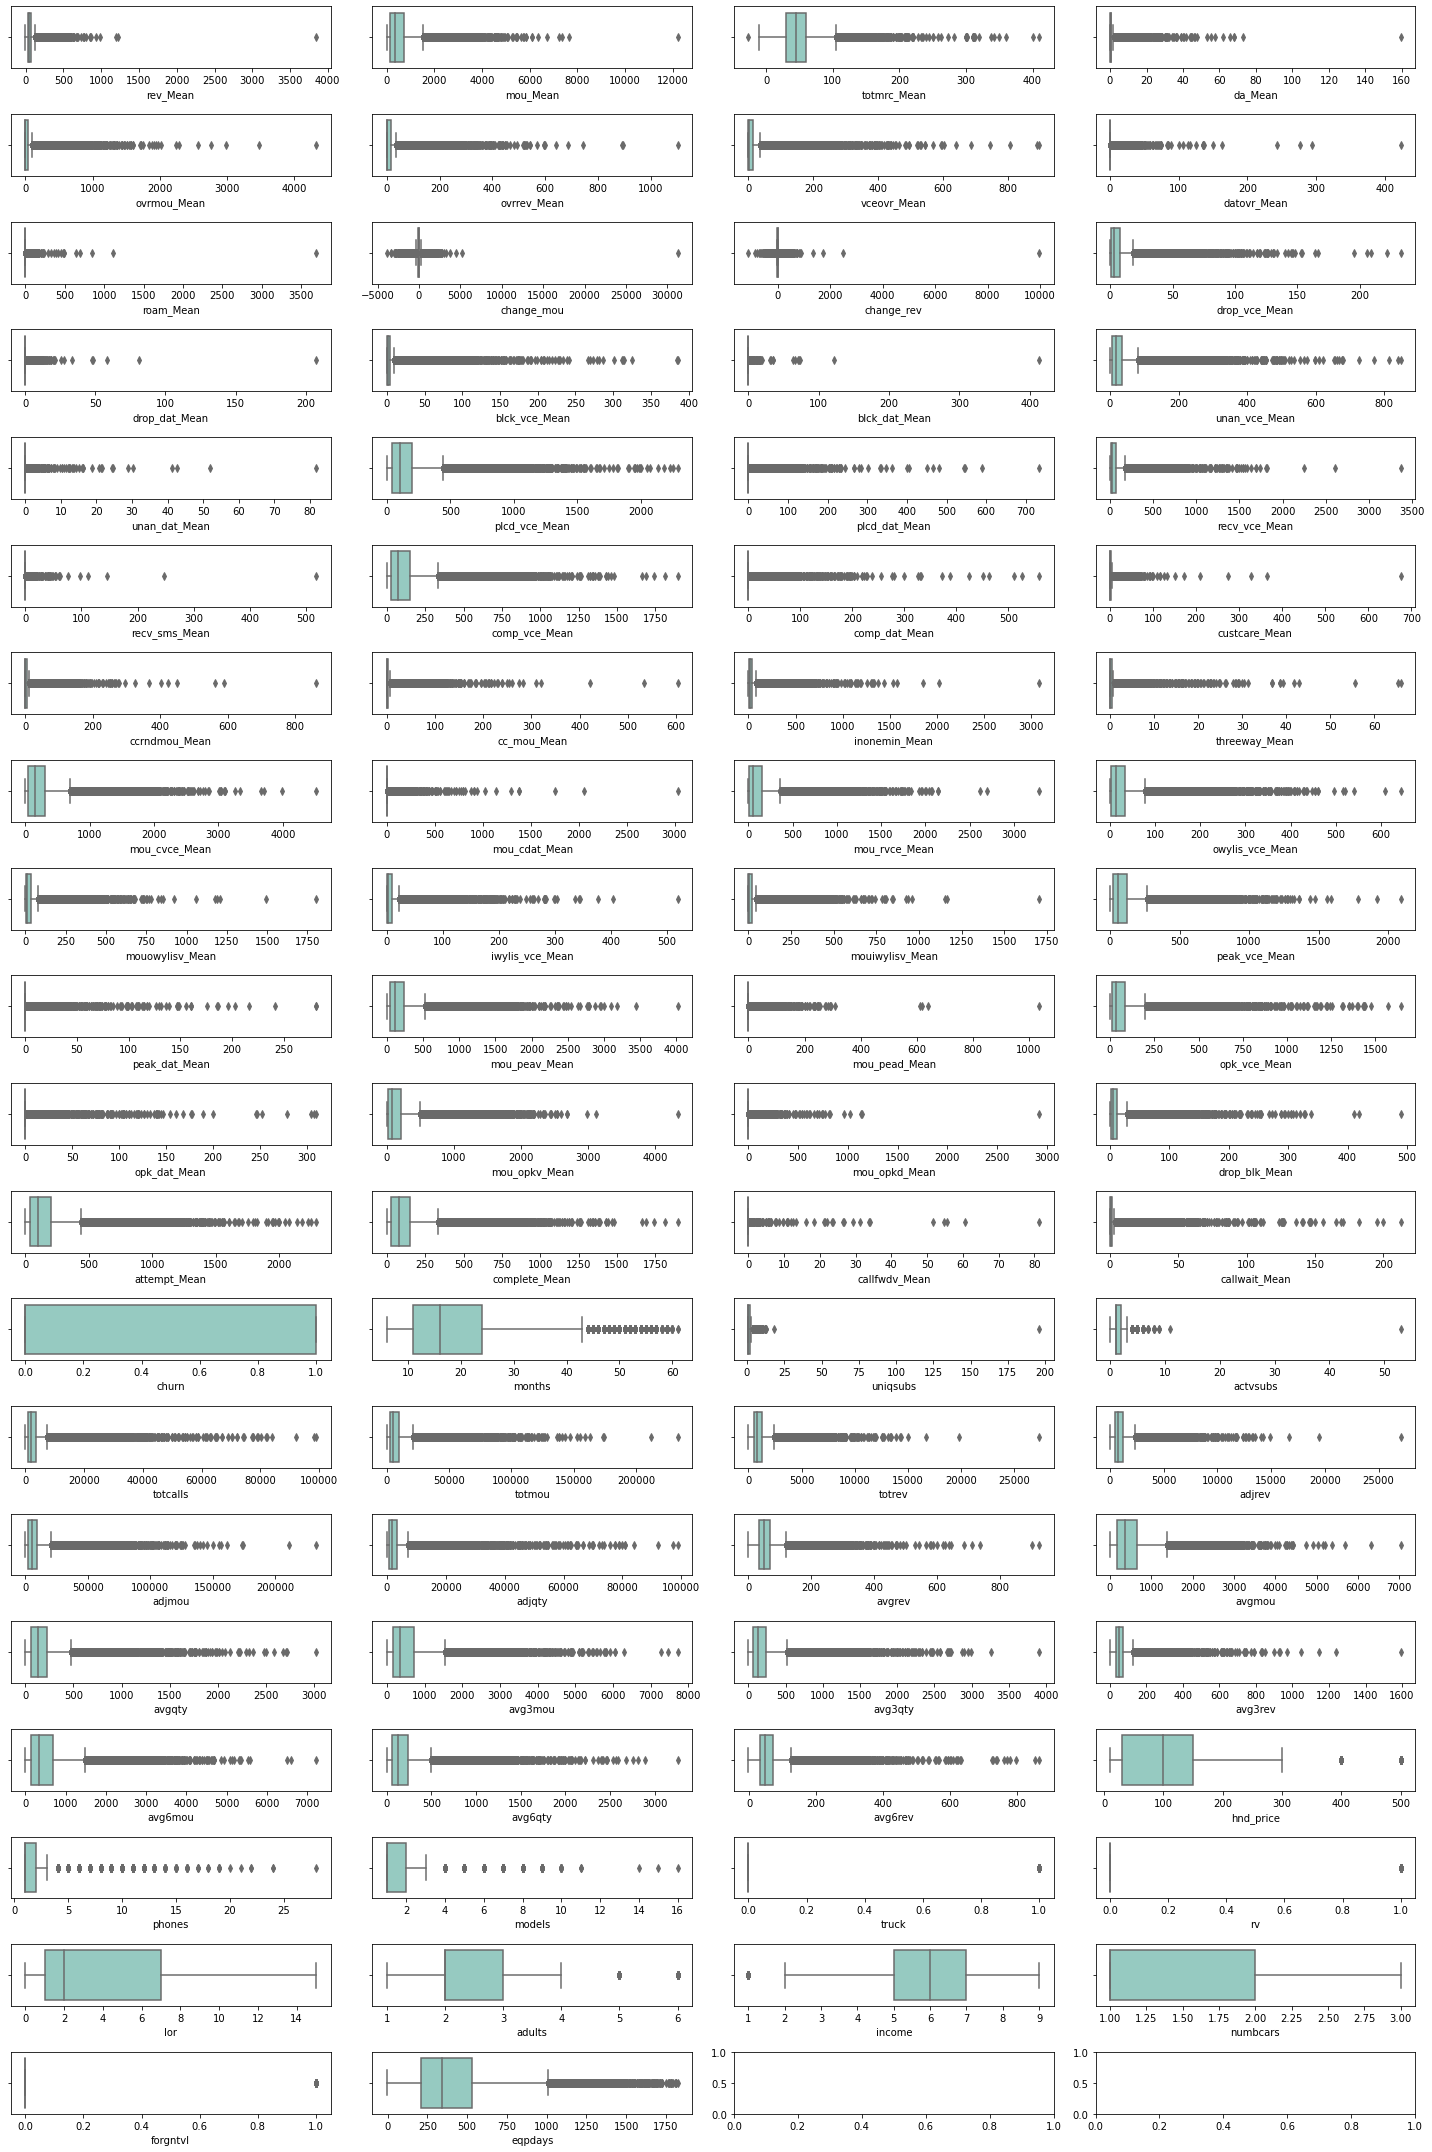

In [14]:
# Box plot of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[:-1].to_list()
fig, ax = plt.subplots(20, 4, figsize = (20, 30))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
fig.tight_layout()

Большинство моделей машинного обучения работают эффективно, если количественые признаки (feature) распределены по нормальному (Гауссовскому) закону распределения. Как видно выше, для большинства признаков из представленного dataset это не так: распределение ассиметрично и отчетливо "скошено" влево. Попробуем для таких признаков предварительно сделать нелинейное преобразование, которое позволит получить случайную величину, распредление которой будет больше напоминать нормальное.

Так, в частности распределение некоторых признаков напоминает 'Power Low' и для них целесообразно применить Box-Cox Transformation, однако среди данных присутствуют в небольшом количестве отрицательные значение. Поэтому кастомизируем преобразование

In [15]:
cols_to_Box_Cox_transform = ['rev_Mean', 'mou_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'drop_vce_Mean', 'blck_vce_Mean', 'unan_vce_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callwait_Mean', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'eqpdays']

In [16]:
#import math
def boxcox_transform(x, lmbda = .5):
    return x**lmbda if x > 0 else x

In [17]:
def get_lmbdas(columns):
    fitted_lambdas = []
    for c in cols_to_Box_Cox_transform:
        pos_col = df[c].gt(0)
        _, fitted_lambda = stats.boxcox(df.loc[pos_col, c])
        if (0 <= fitted_lambda or fitted_lambda > 1):
            fitted_lambda = .5
        fitted_lambdas.append(fitted_lambda)
    return list(zip(columns, fitted_lambdas))

In [18]:
lmbdas = get_lmbdas(cols_to_Box_Cox_transform)

In [19]:
# Transform selected columns
for c in cols_to_Box_Cox_transform:
    df[c] = df[c].map(boxcox_transform)

Распределение количественных признаков после трансформации данных

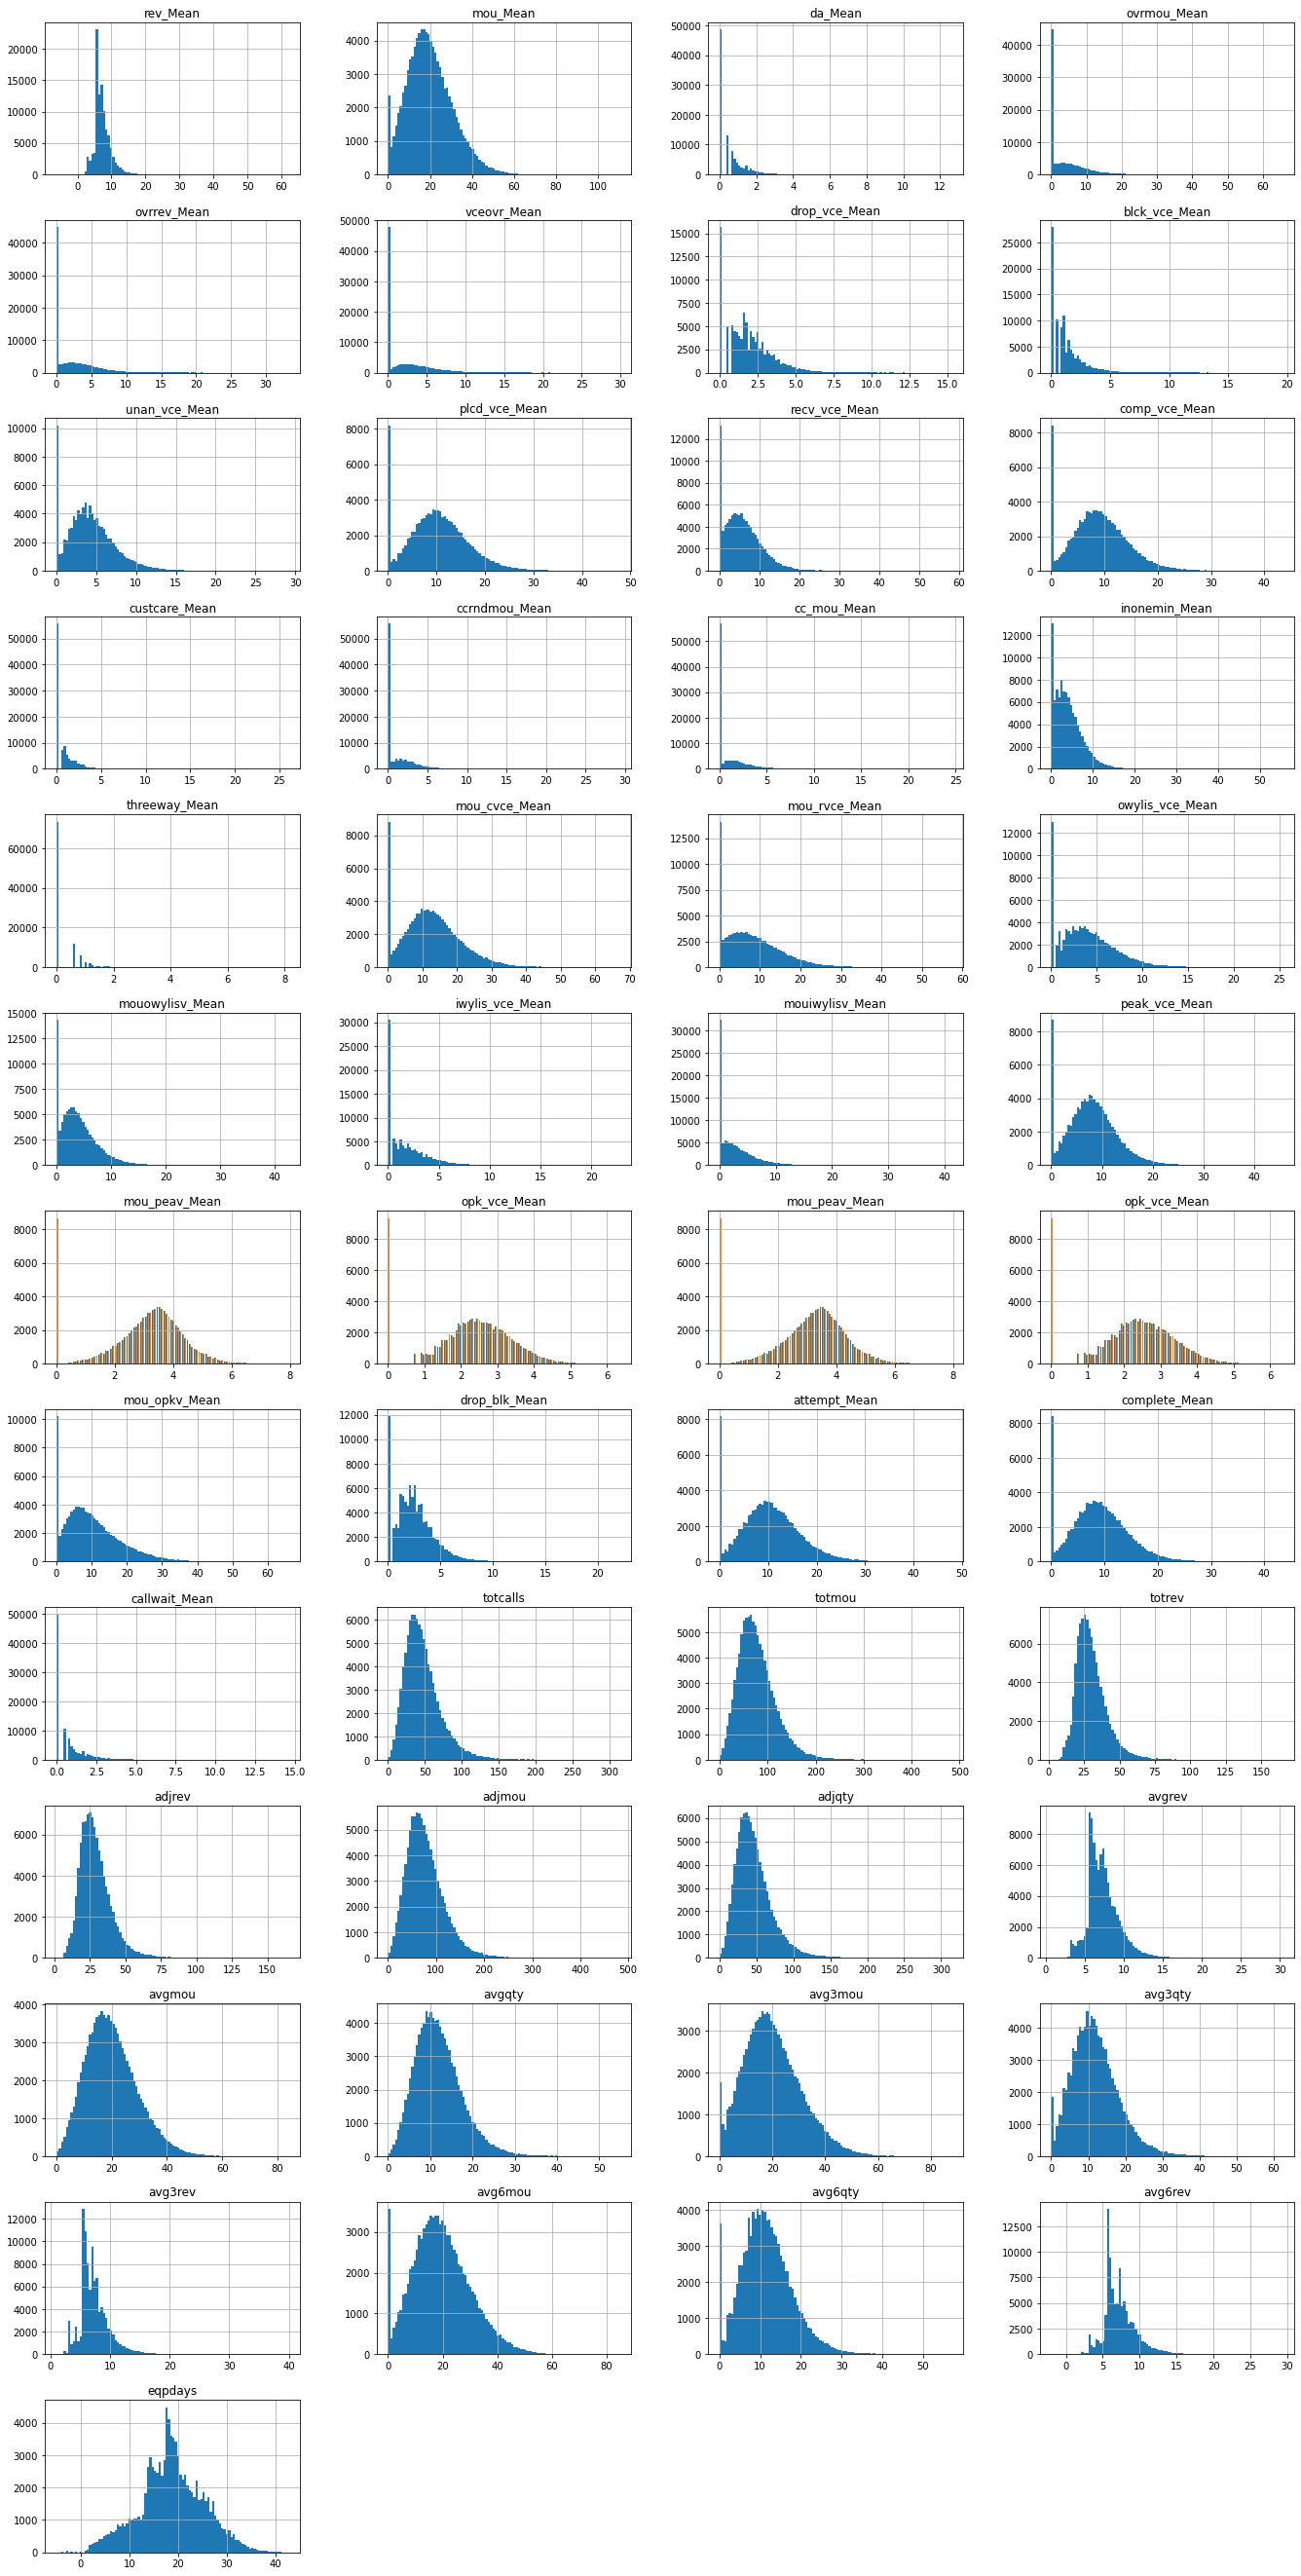

In [20]:
df.loc[:,cols_to_Box_Cox_transform].hist(bins=100,figsize=(23,74),layout=(20,4));

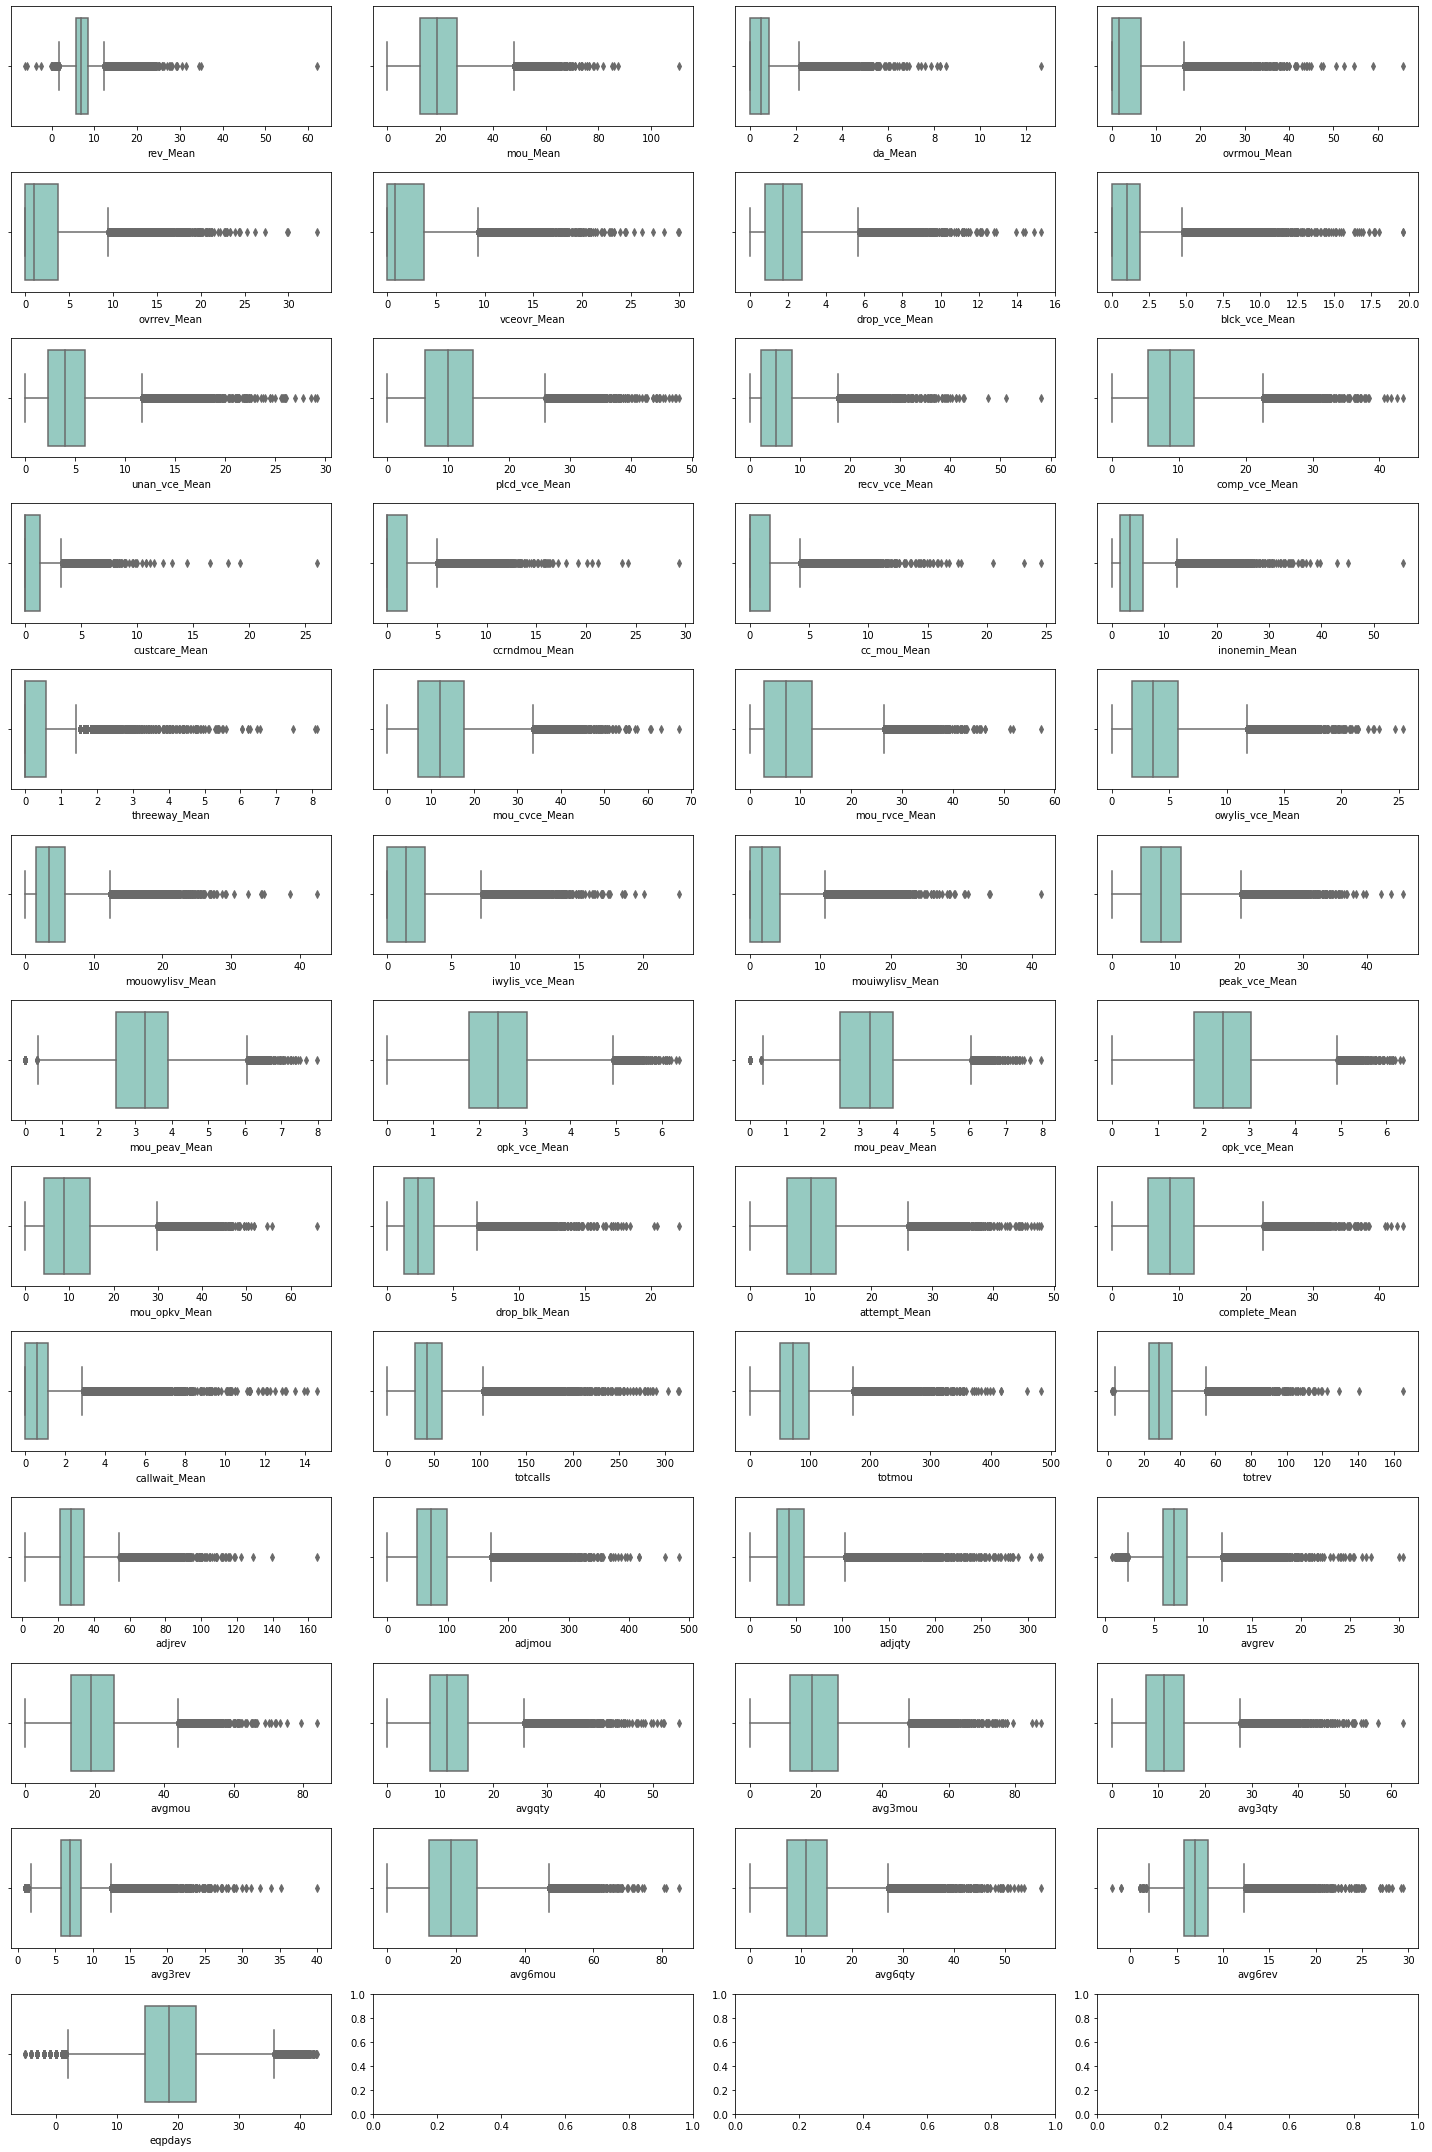

In [21]:
fig, ax = plt.subplots(13, 4, figsize = (20, 30))
ax = ax.flatten()
for i, c in enumerate(cols_to_Box_Cox_transform):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
fig.tight_layout()

Не все признаки имеют близкое к нормальному распределение, но в целом после трансформации визуально многие стали гораздо ближе к нормальному

In [22]:
# Check for complex and inf values (if it was appeared bad values after transformation)
df[df.isna().any(1)]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


In [24]:
s = 0
for c in numerical_features:
    s += np.isinf(df[c]).values.sum()
print(s)

0


In [26]:
s = 0
for c in numerical_features:
    s += np.iscomplex(df[c]).sum()
print(s)

0


In [28]:
# counting outliers
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # Low quartile
        Q1 = np.percentile(df[c],25)
        # High quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 2.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [29]:
# drop missing values only in training dataset
df_train = pd.read_csv("./telecom_churn/train/telcom_churn_train.csv", encoding="utf-8")
df_train_filter = df['Customer_ID'].isin(df_train['Customer_ID'])

In [30]:
df.loc[detect_outliers(df.loc[df_train_filter], ['uniqsubs', 'actvsubs'])].shape

(940, 100)

In [31]:
# drop outliers
df = df.drop(detect_outliers(df.loc[df_train_filter],['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

In [32]:
df.shape

(99060, 100)

### One-Hot encoding

In [33]:
# Unique variables of object columns
encoding_col = []
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique(), end=' | ')
    encoding_col.append(i)

new_cell --> 3 | crclscod --> 54 | asl_flag --> 2 | prizm_social_one --> 6 | area --> 20 | dualband --> 5 | refurb_new --> 3 | hnd_webcap --> 4 | ownrent --> 3 | dwlltype --> 3 | marital --> 6 | infobase --> 3 | HHstatin --> 7 | dwllsize --> 16 | ethnic --> 18 | kid0_2 --> 3 | kid3_5 --> 3 | kid6_10 --> 3 | kid11_15 --> 3 | kid16_17 --> 3 | creditcd --> 3 | 

In [34]:
# dropping the columns that seem to have no significant contribution to the model and may significant boost number of features after encoding
df.drop(['crclscod', 'dwllsize'],axis=1,inplace=True)

In [35]:
encoding_col = [ i for i in df.select_dtypes(include='object')]

In [36]:
# one-hot encoding for variables with more than 2 categories
df.select_dtypes(include='object')
df = pd.get_dummies(df, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [37]:
df.shape

(99060, 161)

### Feature engeniring

In [38]:
# Create correlation matrix
corr_matrix = df.corr().abs()
#print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

In [39]:
df.shape

(99060, 138)

In [40]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc.tail(10)

mou_peav_Mean     0.07
opk_vce_Mean      0.07
mou_cvce_Mean     0.07
totmrc_Mean       0.07
asl_flag_Y        0.07
mou_Mean          0.07
hnd_webcap_WCMB   0.09
hnd_price         0.10
eqpdays           0.12
churn             1.00
Name: churn, dtype: float64

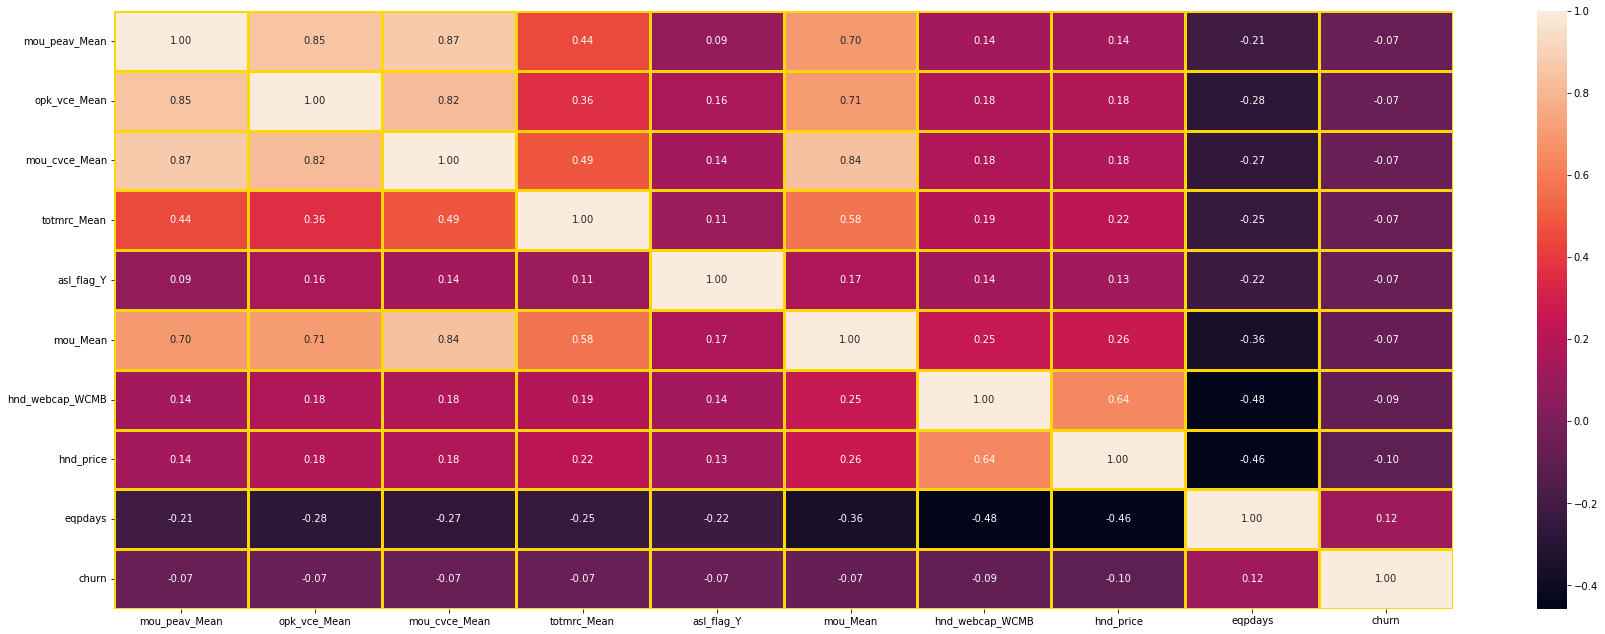

In [41]:
plt.figure(figsize=(30,11))
sns.heatmap(df[dict(sc.tail(10)).keys()].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

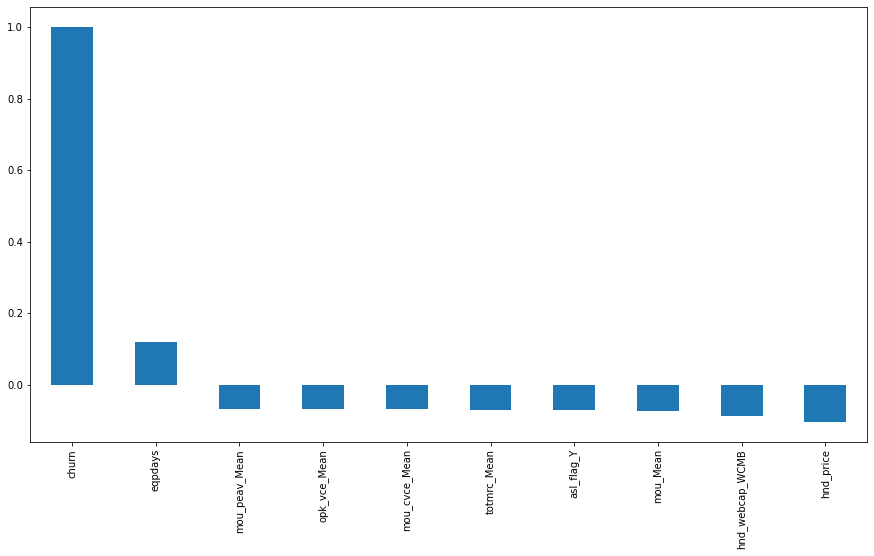

In [42]:
# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
df[dict(sc.tail(10)).keys()].corr()['churn'].sort_values(ascending = False).plot(kind='bar');

Кореляция (линейная статистическая зависимость) между целевым и остальными признаками очень слабая. По-видимо, для приемлемого уровня классификации понадобятся нелинейные преобразования

### Train - Test Split

In [43]:
# dependent and independent variables were determined as
# X = df.drop('churn', axis=1)
# y = df['churn']
# to get random sets:
#from sklearn.model_selection import train_test_split

# Using prepared files instead of random split
#df_train = pd.read_csv("./telecom_churn/train/telcom_churn_train.csv", encoding="utf-8") # already opened
df_test = pd.read_csv("./telecom_churn/test/telcom_churn_test.csv", encoding="utf-8")

df_train = df[df['Customer_ID'].isin(df_train['Customer_ID'])]
df_train.drop(['Customer_ID'], axis = 1, inplace=True)
X_train = df_train.drop('churn', axis=1)
y_train = df_train['churn']

df_test = df[df['Customer_ID'].isin(df_test['Customer_ID'])]
df_test.drop(['Customer_ID'], axis = 1, inplace=True)
X_test = df_test.drop('churn', axis=1)
y_test = df_test['churn']


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(69059, 136) (69059,) (20001, 136) (20001,)


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [45]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#For cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [46]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [47]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))

    plt.show()

In [48]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) # Instantiating the algorithm class and unpacking parameters if any
    start = time.time()
    model.fit(X_train, y_train)
    print(alg_name)
    print('\nLearning time duration: {} min, {:2f} sec'.format((time.time() - start)//60,(time.time() - start)%60))
    
    def get_predict(X_new):
        if hasattr(model, 'predict_proba'):
            y_pred = model.predict_proba(X_new)
        else:
            y_pred = model.predict(X_new)
        return y_pred
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        quality_report(y_pred, y_true)
        plot_roc_curve(y_pred, y_true)

    print("\nTrain quality")
    y_pred = model.predict(X_train)
    y_pred_proba = get_predict(X_train)
    print_scores(alg, y_train, y_pred)
    
    print("\nTest quality")
    y_pred = model.predict(X_test)
    y_pred_proba = get_predict(X_test)
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'not churn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Confusion Matrix', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model

### Classification models applying (at first with default parameters)

Decision Tree Classification

Learning time duration: 0.0 min, 7.722996 sec

Train quality
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1_score: 1.000


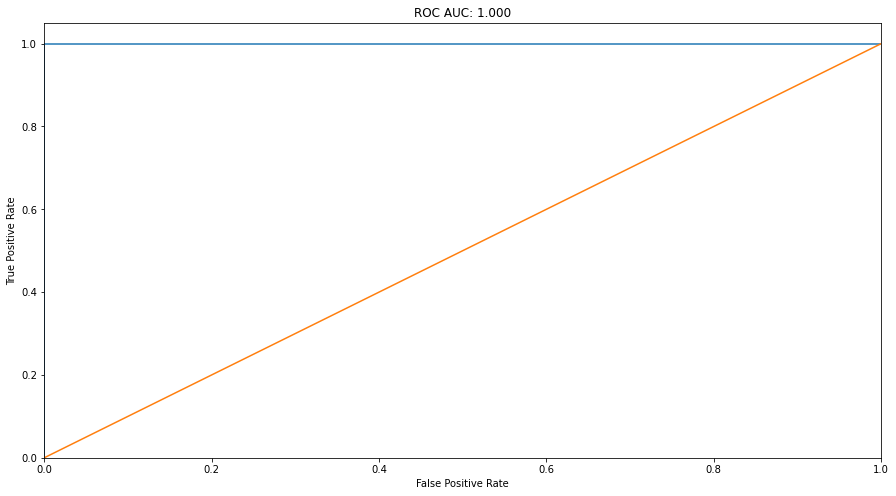


Test quality
Accuracy: 0.552
Precision: 0.548
Recall: 0.548
f1_score: 0.548


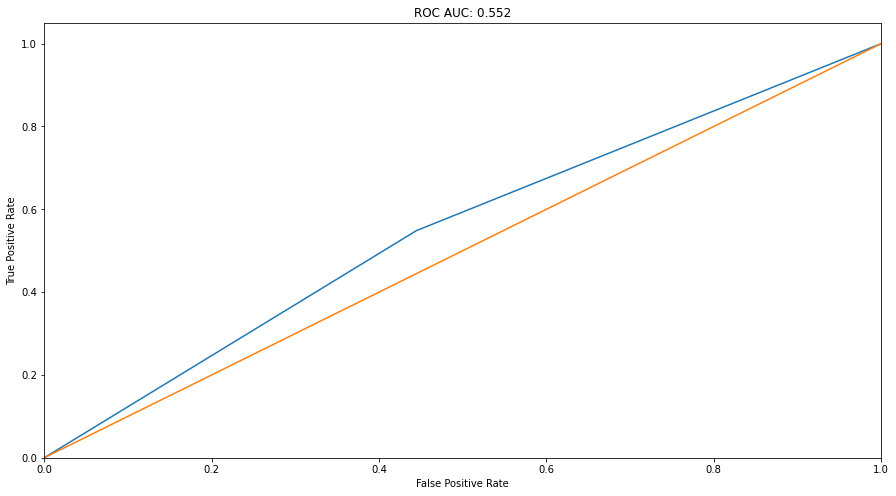

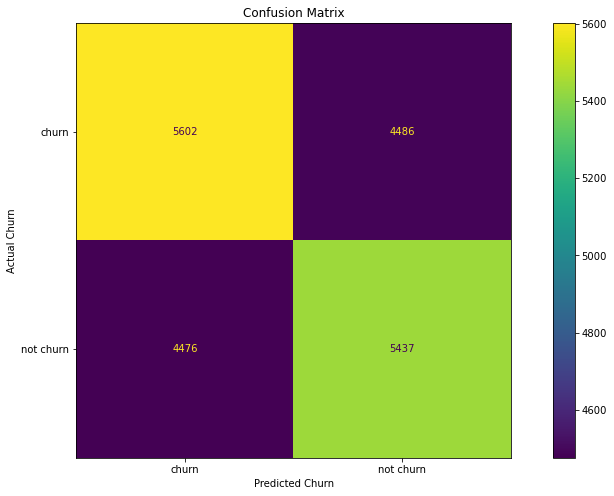

In [49]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Random Forest

Learning time duration: 0.0 min, 49.021518 sec

Train quality
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1_score: 1.000


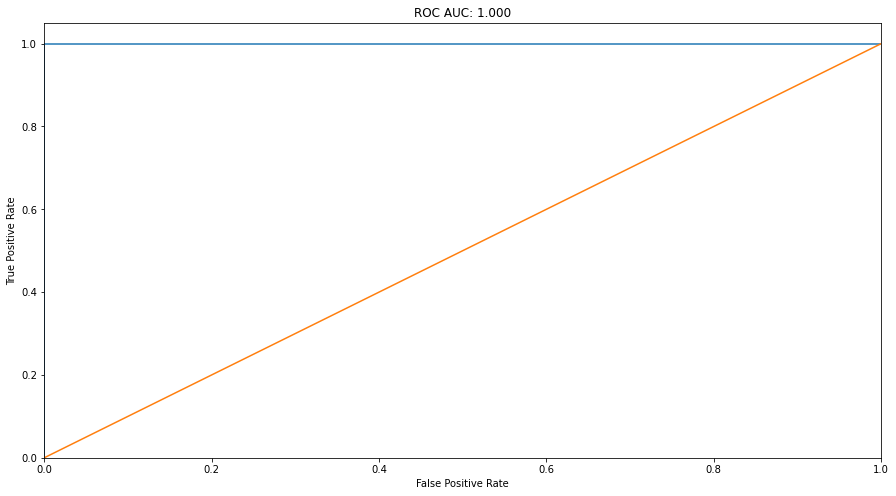


Test quality
Accuracy: 0.622
Precision: 0.614
Recall: 0.620
f1_score: 0.617


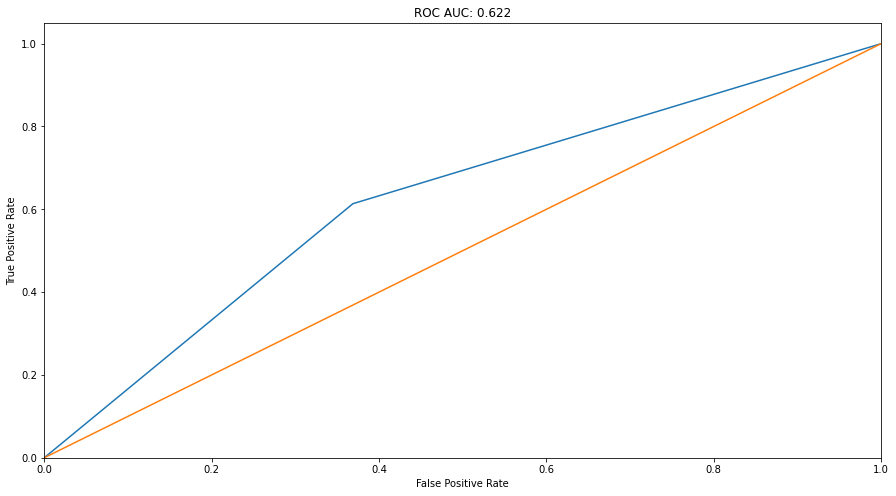

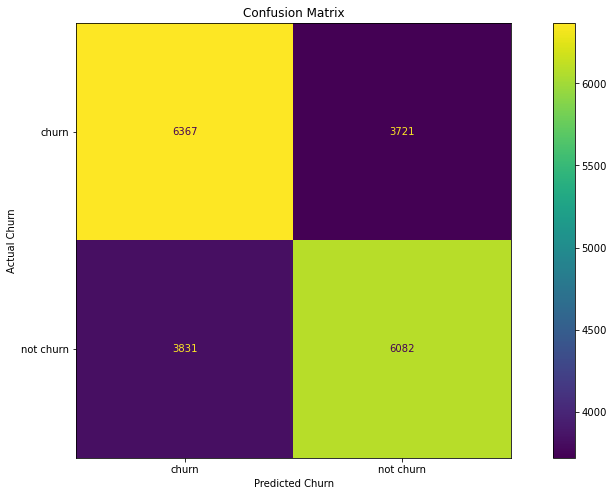

In [50]:
# Running RandomForestClassifier model
RF_model = modeling(RandomForestClassifier, 'Random Forest')

Ada Boost Classifier

Learning time duration: 0.0 min, 23.029456 sec

Train quality
Accuracy: 0.623
Precision: 0.619
Recall: 0.619
f1_score: 0.619


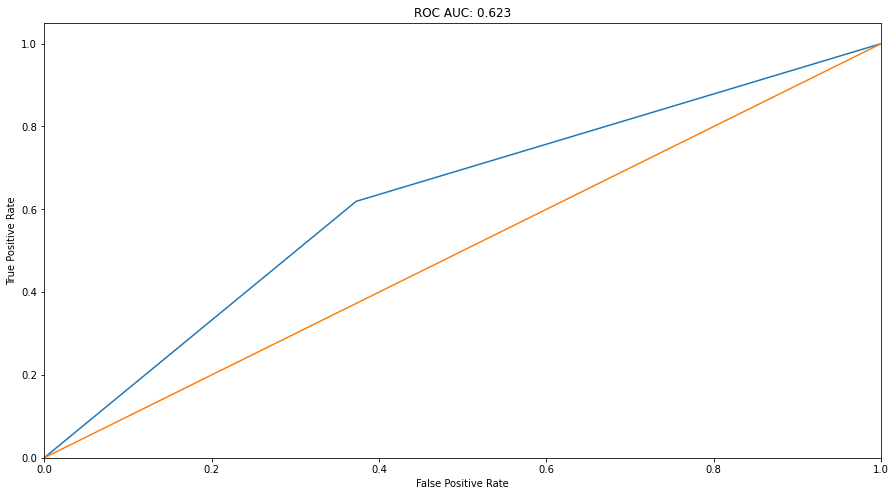


Test quality
Accuracy: 0.617
Precision: 0.616
Recall: 0.614
f1_score: 0.615


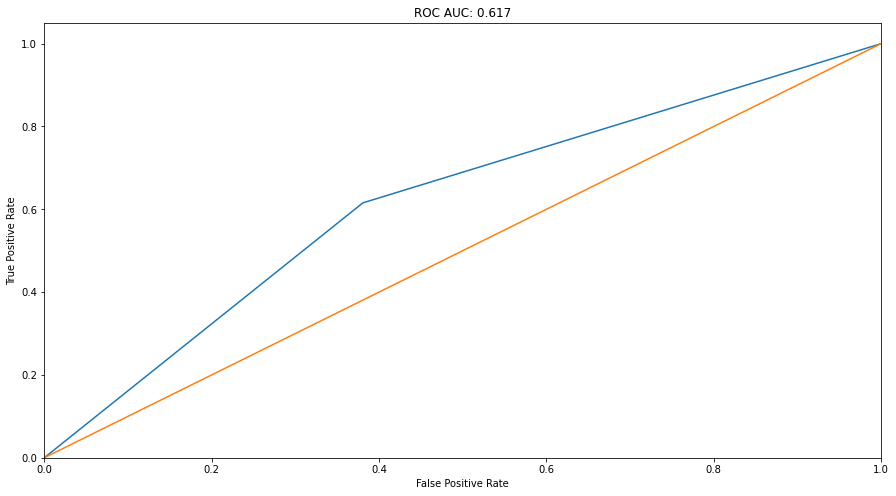

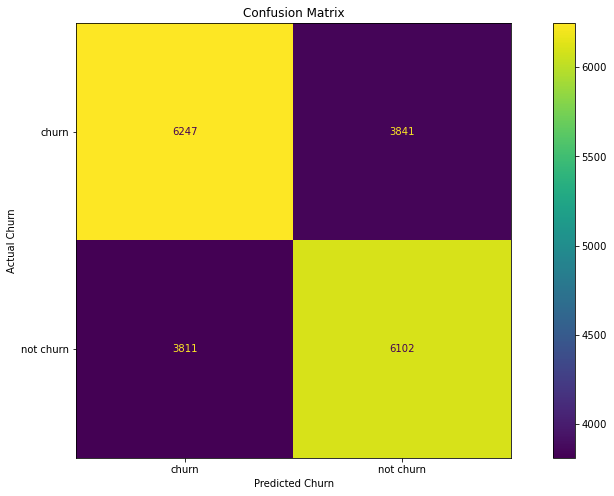

In [51]:
# Ada Boost
ada_model=modeling(AdaBoostClassifier, "Ada Boost Classifier")

Gradient Boosting Classifier

Learning time duration: 1.0 min, 43.461547 sec

Train quality
Accuracy: 0.640
Precision: 0.665
Recall: 0.629
f1_score: 0.646


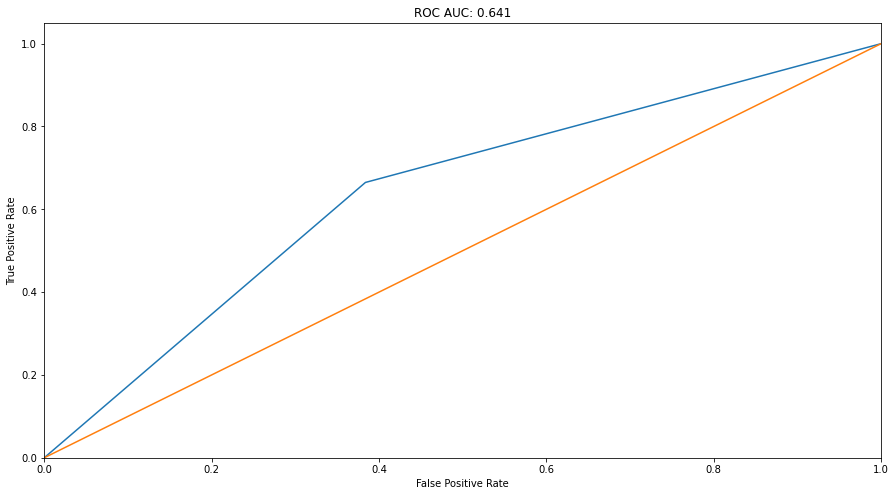


Test quality
Accuracy: 0.627
Precision: 0.650
Recall: 0.618
f1_score: 0.633


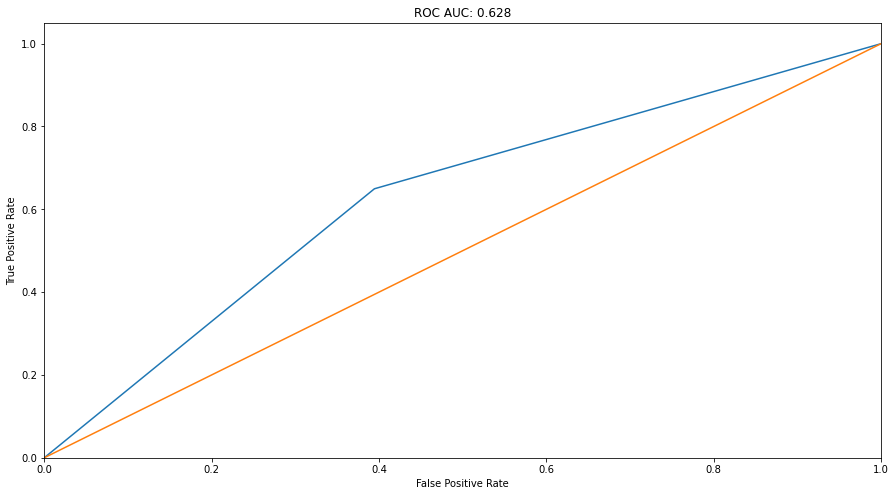

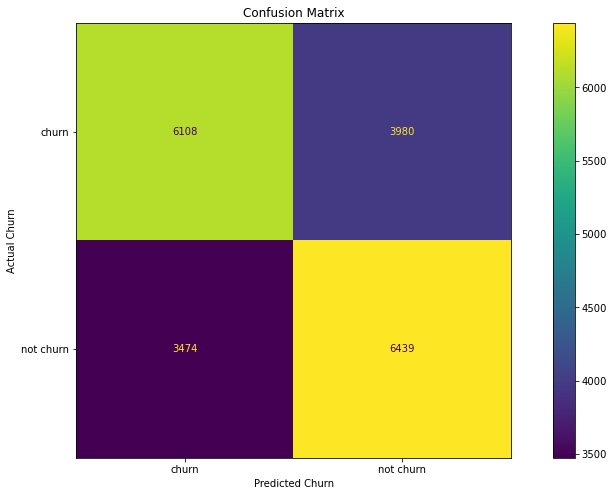

In [52]:
# Gradient Boosting
gbm_model=modeling(GradientBoostingClassifier, "Gradient Boosting Classifier")

Light GBM

Learning time duration: 0.0 min, 3.882997 sec

Train quality
Accuracy: 0.686
Precision: 0.696
Recall: 0.678
f1_score: 0.687


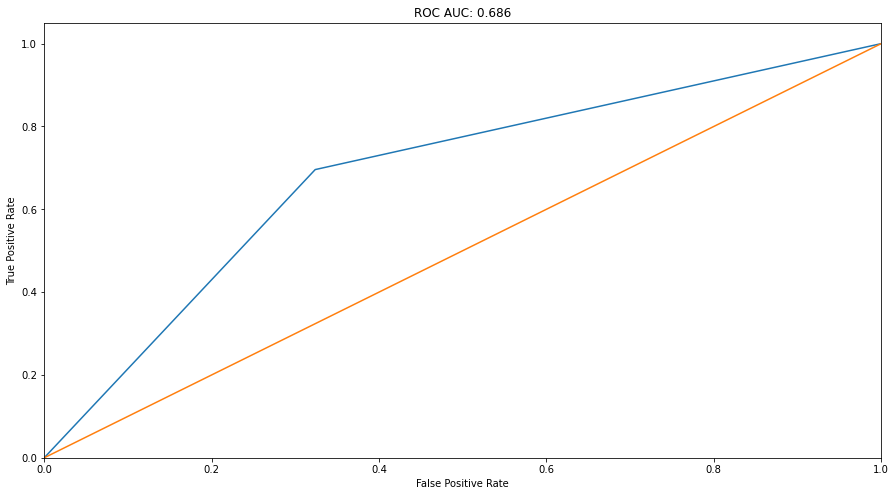


Test quality
Accuracy: 0.636
Precision: 0.647
Recall: 0.629
f1_score: 0.638


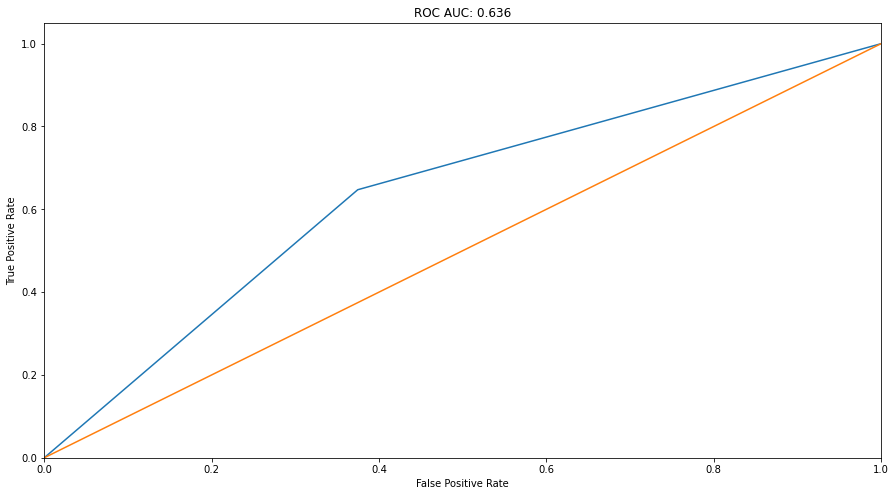

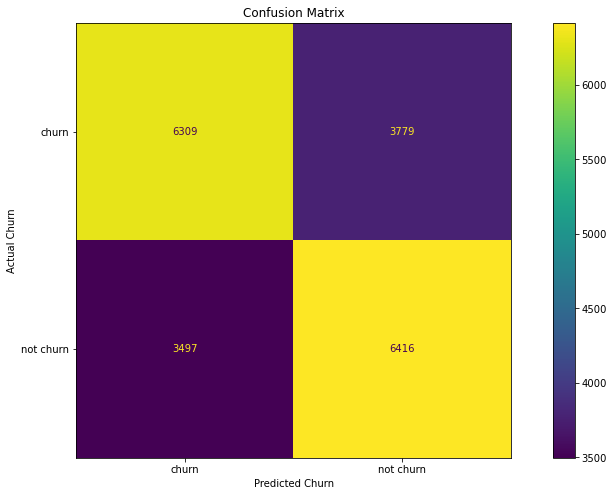

In [53]:
# LightGBM model
import lightgbm as lgb
LGBM_model = modeling(lgb.LGBMClassifier, 'Light GBM')

k-nearest neighbors

Learning time duration: 0.0 min, 0.079003 sec

Train quality
Accuracy: 0.706
Precision: 0.687
Recall: 0.709
f1_score: 0.698


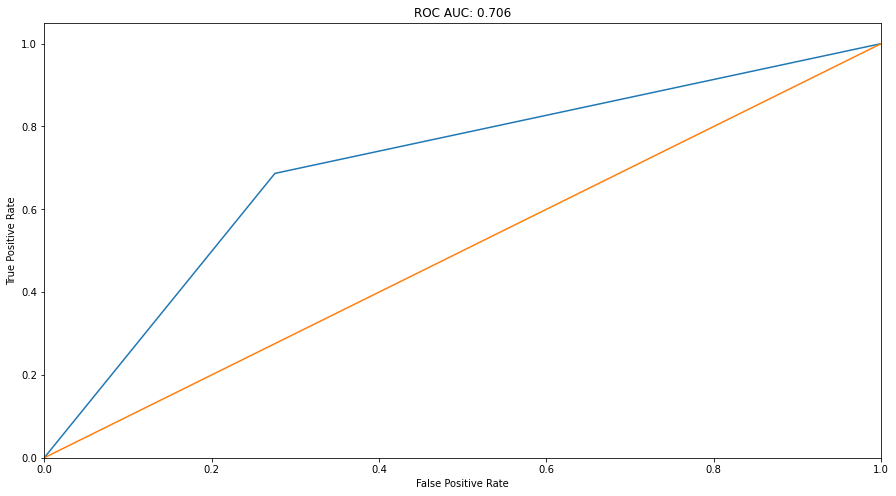


Test quality
Accuracy: 0.532
Precision: 0.506
Recall: 0.530
f1_score: 0.518


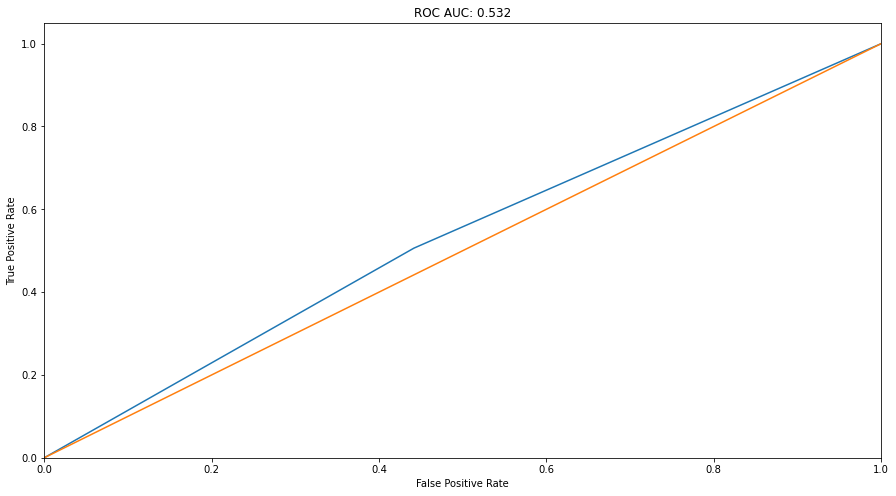

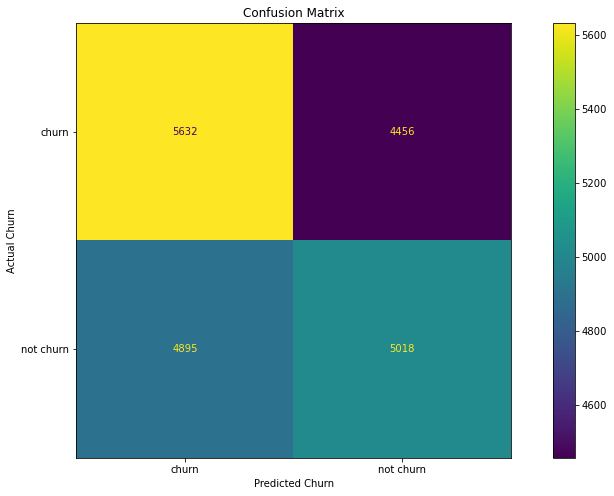

In [54]:
# k-nearest neighbors
knn = modeling(KNeighborsClassifier, "k-nearest neighbors")

Logistic Regression

Learning time duration: 0.0 min, 3.930634 sec

Train quality
Accuracy: 0.607
Precision: 0.597
Recall: 0.604
f1_score: 0.600


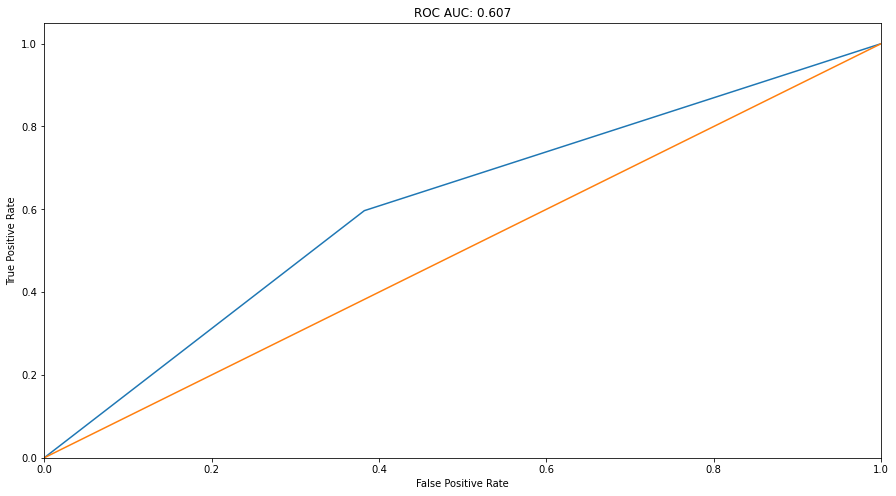


Test quality
Accuracy: 0.606
Precision: 0.602
Recall: 0.603
f1_score: 0.602


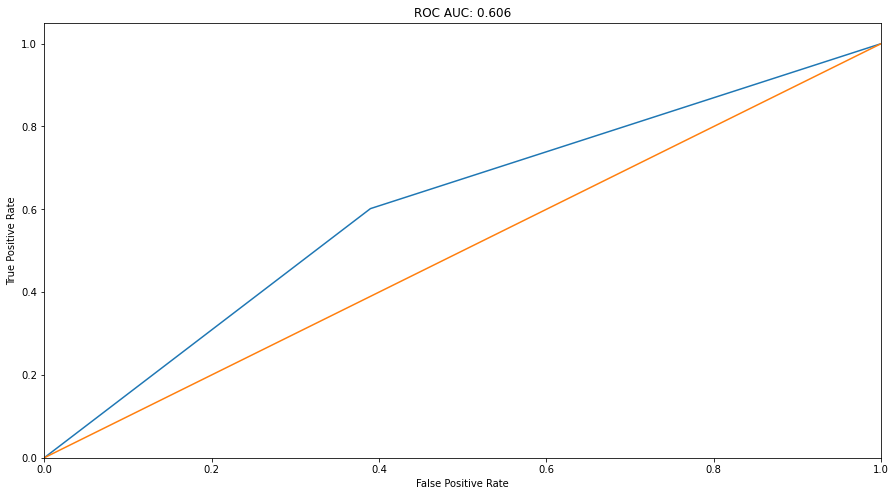

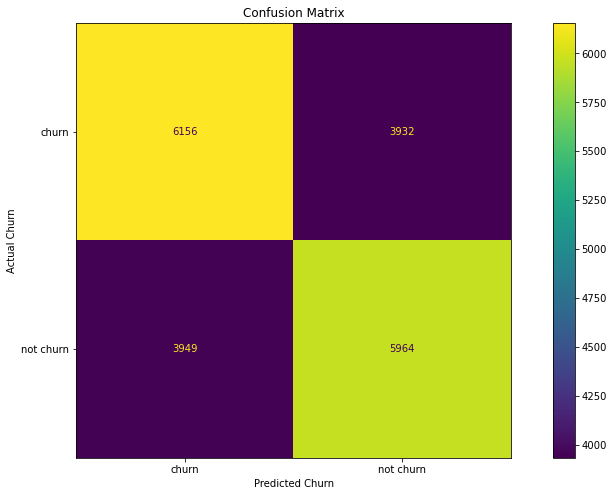

In [55]:
# Logistic Regression
log_reg = modeling(LogisticRegression, "Logistic Regression")

Support Vector Machine

Learning time duration: 17.0 min, 30.917905 sec

Train quality
Accuracy: 0.715
Precision: 0.715
Recall: 0.711
f1_score: 0.713


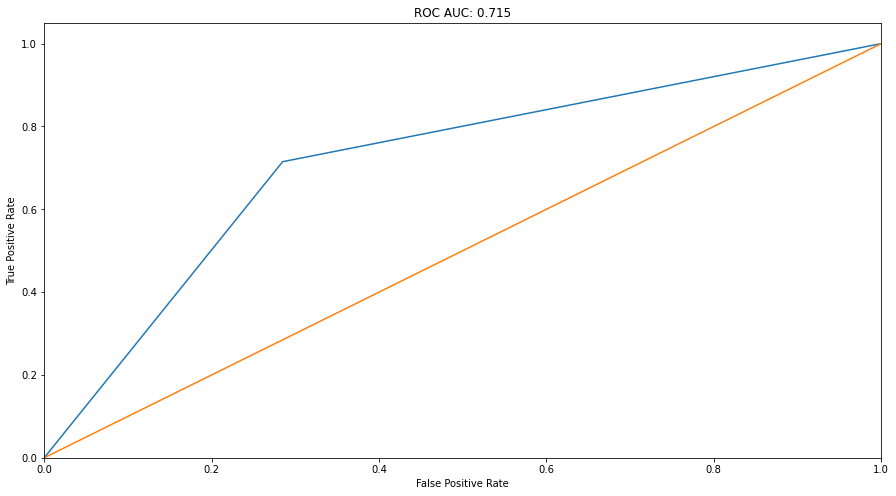


Test quality
Accuracy: 0.617
Precision: 0.612
Recall: 0.614
f1_score: 0.613


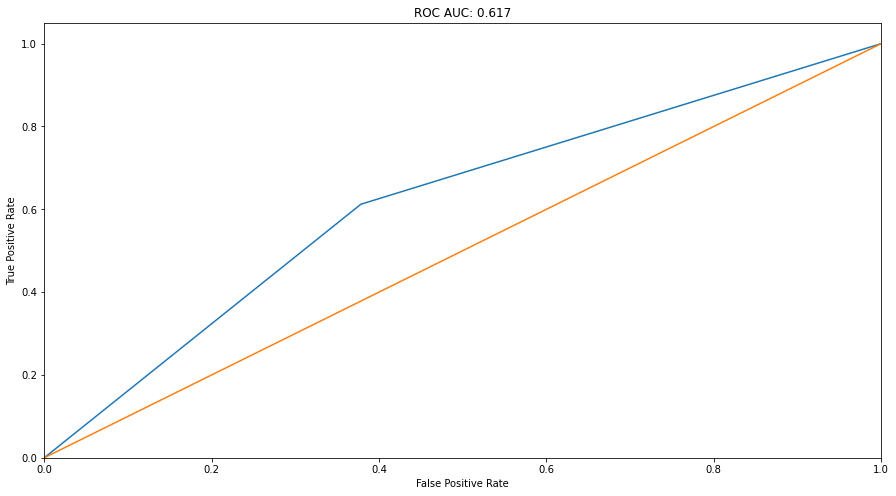

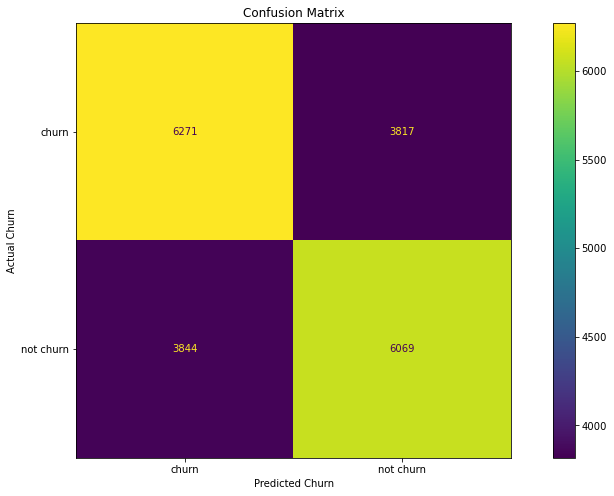

In [386]:
## Support Vector Machine
#svm = modeling(SVC, "Support Vector Machine")

## Comparing the results

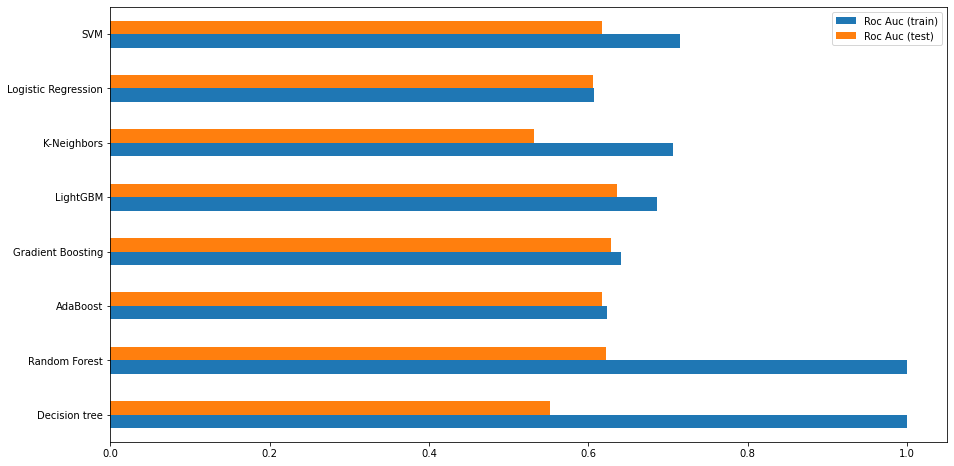

In [56]:
models = ['Decision tree','Random Forest', 'AdaBoost', 'Gradient Boosting','LightGBM', 'K-Neighbors', 'Logistic Regression', 'SVM']
RocAucTrain = [1., 1., .623, .641, .686, .706, .607, .715]
RocAucTest = [ .552, .622, .617, .628, .636, .532, .606, .617 ]
df_scores = pd.DataFrame({'Roc Auc (train)': RocAucTrain, 'Roc Auc (test)': RocAucTest}, index=models)
ax = df_scores.plot.barh()

## Выводы:
Модель решающего дерева переобучилась, запомнила "шумы" и на тесте показала очень слабый результат, что характерно для дерева без дополнительной регуляризации. Случайный лес показал результат несколько лучше, но также сильно переобучен.
SVM очень затратен по времени. Имеет смысл применить kernel trick, однако для настройки параметров потребуют значительные вычислительные ресурсы.
Логистическая регрессия показала одинаково низкий результат и на тренировочной, и на тестовой выборке. Тут обратный вариант: модель имеет высокую систематическую ошибки (bias).
Модели градиентного бустинга показывают лучший результат из представленных моделей (*0.636*), но он катастрофически низкий, чтобы считать качество модели приемлемым. Примем полученный результат в качестве baseline и попробуем его улучшить. Для этого необходимо выполнить более тонкую настройку гиперпараметров.

### Градиентный бустинг

In [57]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import xgboost as xgb
from sklearn.metrics import auc

def calc_auc(y, y_pred, plot_label='', prin=True):
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

def score(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_jobs'] = -1
    print("Training with params : ", params)
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred_xgb_test = clf.predict_proba(X_test)[:, 1]
    auc = calc_auc(y_test, y_pred_xgb_test, prin=False)
    result = {'loss': 1-auc, 'status': STATUS_OK}
    print('TEST ROC AUC: {0:.4f}'.format(auc))
    return result

space = {'max_depth' : hp.quniform('max_depth', 2, 5, 1),
         'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
         'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
         'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
         'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
         'n_estimators': hp.choice('n_estimators', [50, 70, 100, 300]),
         'learning_rate': hp.choice('learning_rate', [.02, .03])}

trials = Trials()

best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=20)

Training with params :                                
{'colsample_bytree': 0.8500000000000001, 'gamma': 0.75, 'learning_rate': 0.02, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 300, 'subsample': 0.8, 'n_jobs': -1}
TEST ROC AUC: 0.6896                                  
Training with params :                                                          
{'colsample_bytree': 1.0, 'gamma': 0.8, 'learning_rate': 0.02, 'max_depth': 2, 'min_child_weight': 6.0, 'n_estimators': 300, 'subsample': 0.7000000000000001, 'n_jobs': -1}
TEST ROC AUC: 0.6607                                                            
Training with params :                                                          
{'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 5.0, 'n_estimators': 50, 'subsample': 0.7000000000000001, 'n_jobs': -1}
TEST ROC AUC: 0.6597                                                            
Training with params :                            

Вывод: даже в самом лучшем результате при различном наборе гиперпараметров метрика ROC AUC на тестовой выборке не достигает 0.7. При этом дисперсия оценок небольшая и на валидационной выборке с использованием одной из данных моделей результат ожидается в диапазоне 0.6-0.7, что недостаточно эффективно для предсказаний

In [132]:
# Do not run: runtime exceptions occured!
#random_state = 42
#classifier = [RandomForestClassifier(random_state = random_state),
#             lgb.LGBMClassifier(random_state = random_state)]
#
#rf_param_grid = {"max_features": [1,3,10],
#                "min_samples_split":[2,3,10],
#                "min_samples_leaf":[1,3,10],
#                "bootstrap":[False],
#                "n_estimators":[100,300],
#                "criterion":["gini"]}
#
#lgbm_params = {'n_estimators': [100, 500, 1000],
#                'subsample': [0.6, 0.8, 1.0],
#                'max_depth': [3, 4, 5],
#                'learning_rate': [0.1,0.01,0.02],
#                "min_child_samples": [5,10,20]}
#
#classifier_param = [rf_param_grid,                   
#                   lgbm_params]
#
# cv_result = []
#
# best_estimators = []
# for i in range(len(classifier)):
#     clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "auc", n_jobs = -1,verbose = 1)
#     clf.fit(X_train,y_train)
#     cv_result.append(clf.best_score_)
#     best_estimators.append(clf.best_estimator_)
#     print(cv_result[i]
#
# cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "RandomForestClassifier","LGBMClassifier"]})
#
# g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
# g.set_xlabel("Mean Accuracy")
# g.set_title("Cross Validation Scores")

### Логистическая регрессия

In [117]:
# Reducing Number of Features for Inference

# Create correlation matrix
corr_matrix_with_target = df.corr()['churn'].abs().sort_values()

threshold = .05
most_influent_features_filter = corr_matrix_with_target.apply(lambda x : 1 > x > threshold )
most_influent_features = corr_matrix_with_target.loc[most_influent_features_filter].keys().tolist()

# store original X_train, X_test to recover
X_train_reserved = X_train
X_test_reserved = X_test

X_train = df_train.loc[:,df_train.columns.isin(most_influent_features)]
X_test = df_test.loc[:,df_test.columns.isin(most_influent_features)]
print(X_train.shape, X_test.shape)

(69059, 22) (20001, 22)


Logistic Regression

Learning time duration: 0.0 min, 0.697383 sec

Train quality
Accuracy: 0.569
Precision: 0.526
Recall: 0.569
f1_score: 0.547


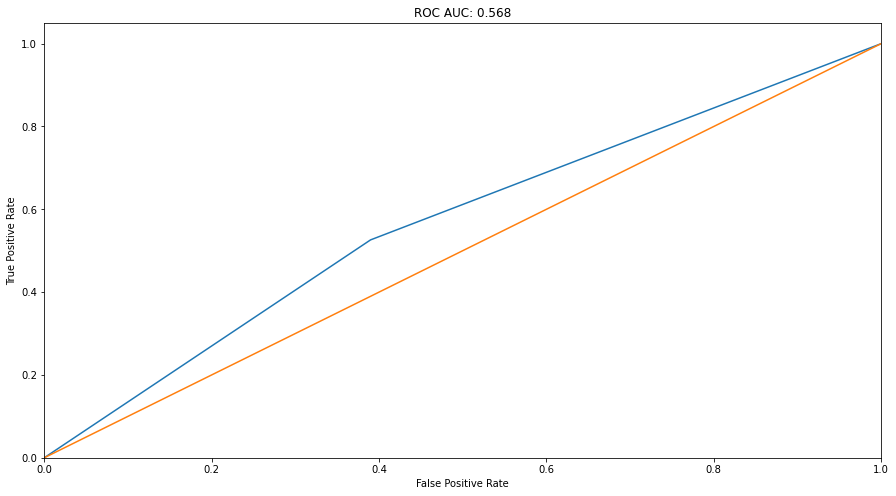


Test quality
Accuracy: 0.567
Precision: 0.523
Recall: 0.569
f1_score: 0.545


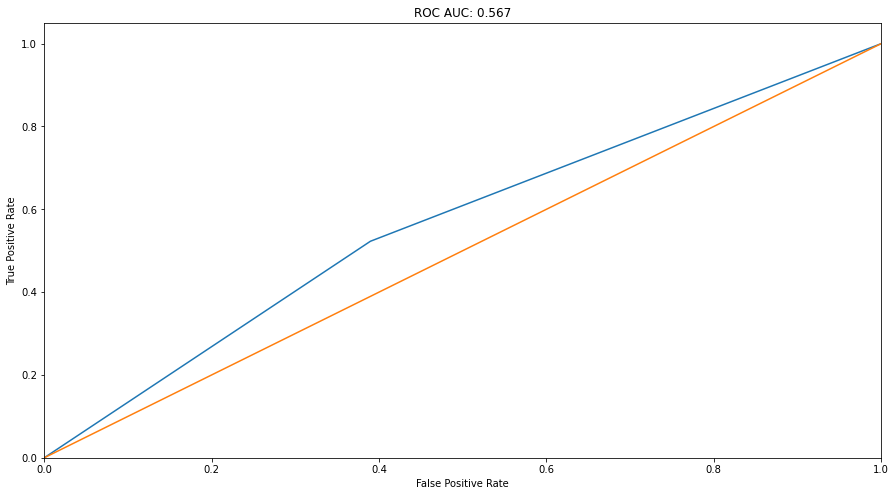

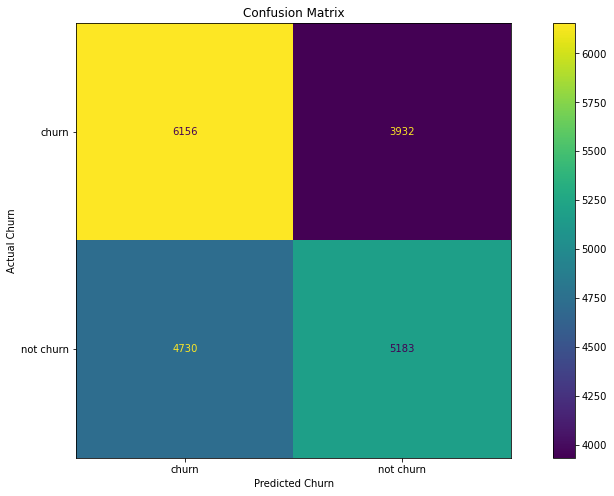

In [118]:
# Logistic Regression (parametrized including regularization)
log_reg_polyn = modeling(LogisticRegression, "Logistic Regression", {'solver' : 'lbfgs', 'C' : 10})

In [120]:
lr = LogisticRegression()
lr_params = {'penalty': ['l1','l2'],'tol': [0.01, 0.03, 0.04, 0.09, 0.1]}
lr_grid = GridSearchCV(lr, lr_params, cv=5, verbose=True, n_jobs=-1)

lr_grid.fit(X_train, y_train)
print("LogReg best score and parameters: ")
print(lr_grid.best_params_, lr_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
LogReg best score and parameters: 
{'penalty': 'l2', 'tol': 0.01} 0.5625042035037443


К сожалению, ни сокращение количество признаков только самыми значимыми, ни подбор гиперпараметров не привели к улучению качества модели логистической регрессии

In [121]:
# recovering datasets
X_train = X_train_reserved
X_test = X_test_reserved

### По результатам анализа наиболее предпочтительные результаты дает модель градиентого бустинга, хоть и результат оставляет желать лучшего
Training with params :                                
{'colsample_bytree': 0.8500000000000001, 'gamma': 0.75, 'learning_rate': 0.02, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 300, 'subsample': 0.8, 'n_jobs': -1}
TEST ROC AUC: 0.6896

In [122]:
# best parameters
params = {'colsample_bytree': 0.85, 'gamma': 0.75, 'learning_rate': 0.02, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 300, 'subsample': 0.8, 'n_jobs': -1}

# apply the best model
best_clf = xgb.XGBClassifier(**params)

# fit to re-check
best_clf.fit(X_train, y_train)
y_pred_xgb = best_clf.predict_proba(X_test)[:, 1]
auc = calc_auc(y_test, y_pred_xgb, prin=False)
auc

0.6896005607628557

### Проверка модели, получение итоговой метрики

In [ ]:
# TO DO to verify model:
# Locate *.csv validation file in the folder and read it. Replace FILE_NAME to real name
df_validation = pd.read_csv("./telecom_churn/validation/FILE_NAME.csv", encoding="utf-8")

df_validation = df[df['Customer_ID'].isin(df_validation['Customer_ID'])]
df_validation.drop(['Customer_ID'], axis = 1, inplace=True)
X_validation = df_validation.drop('churn', axis=1)
y_validation = df_validation['churn']
print(X_validation.shape, y_validation.shape)

# Scaling
X_validation = sc.transform(X_validation)

In [ ]:
print("\nValidation quality (final score metric)")
y_pred = best_clf.predict_proba(X_validation)[:, 1]
plot_roc_curve(y_pred, y_validation)